In [108]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rc("font", family = "Malgun Gothic")
matplotlib.rc("axes",unicode_minus = False)

In [7]:
df1= pd.read_csv('bank.csv')
df1

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,0,88900,57264,90185.0,DebtCon,Other,16.0,0,0.0,221.808718,0.0,16,36.112347
3744,0,89000,54576,92937.0,DebtCon,Other,16.0,0,0.0,208.692070,0.0,15,35.859971
3745,0,89200,54045,92924.0,DebtCon,Other,15.0,0,0.0,212.279697,0.0,15,35.556590
3746,0,89800,50370,91861.0,DebtCon,Other,14.0,0,0.0,213.892709,0.0,16,34.340882


In [ ]:
# bad (y) : 대출상한 여부 0 상환 / 1 미상환
# load : 총대출액 
# mortdue : 저당액 
# value : 재산액 
# reason : debtcon(채무정리) , 주택개량(homeimp)
# job : mgr( 노동자) , office (사무원) , 숙련기술사 (proexe) , 기타 (other), 판매원 (sales), 자영업 (self)
# yoj : 직장근무년수
# derog : 불량거래수
# debtinc : 대출금 대 수입의 비율
# delenq : 체납횟수
# clage : 최장 대출기간 
# minq : 최근 신용거래 요청 

# 결측치 확인 

In [8]:
df1.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [14]:
len(df1['VALUE'])

3748

In [32]:
print("전체 VALUE 데이터",len(df1['VALUE']))
missing_value_rows = df1[df1['VALUE'].isnull()]
print("Value 결측치 :",len(missing_value_rows))
print("\n")
print("전체 JOB 데이터",len(df1['JOB']))
missing_value_rows = df1[df1['JOB'].isnull()]
print("JOB 결측치 :",len(missing_value_rows))
print("\n")
print("전체 YOJ 데이터",len(df1['YOJ']))
missing_value_rows = df1[df1['YOJ'].isnull()]
print("YOJ 결측치 :",len(missing_value_rows))
print("\n")
print("전체 DELINQ 데이터",len(df1['DELINQ']))
missing_value_rows = df1[df1['DELINQ'].isnull()]
print("DELINQ 결측치 :",len(missing_value_rows))
print("\n")
print("전체 CLAGE 데이터",len(df1['CLAGE']))
missing_value_rows = df1[df1['CLAGE'].isnull()]
print("CLAGE 결측치 :",len(missing_value_rows))
print("\n")
print("전체 NINQ 데이터",len(df1['NINQ']))
missing_value_rows = df1[df1['NINQ'].isnull()]
print("NINQ 결측치 :",len(missing_value_rows))

전체 VALUE 데이터 3748
Value 결측치 : 14


전체 JOB 데이터 3748
JOB 결측치 : 81


전체 YOJ 데이터 3748
YOJ 결측치 : 205


전체 DELINQ 데이터 3748
DELINQ 결측치 : 30


전체 CLAGE 데이터 3748
CLAGE 결측치 : 37


전체 NINQ 데이터 3748
NINQ 결측치 : 56


## 결측치에 해당하는 행에 결측치 비율을 구해본 결과 10% 미만이므로 제거하는 방향으로 진행

In [33]:
df1.dropna(inplace =True)

In [36]:
df1.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

## 이상치 확인

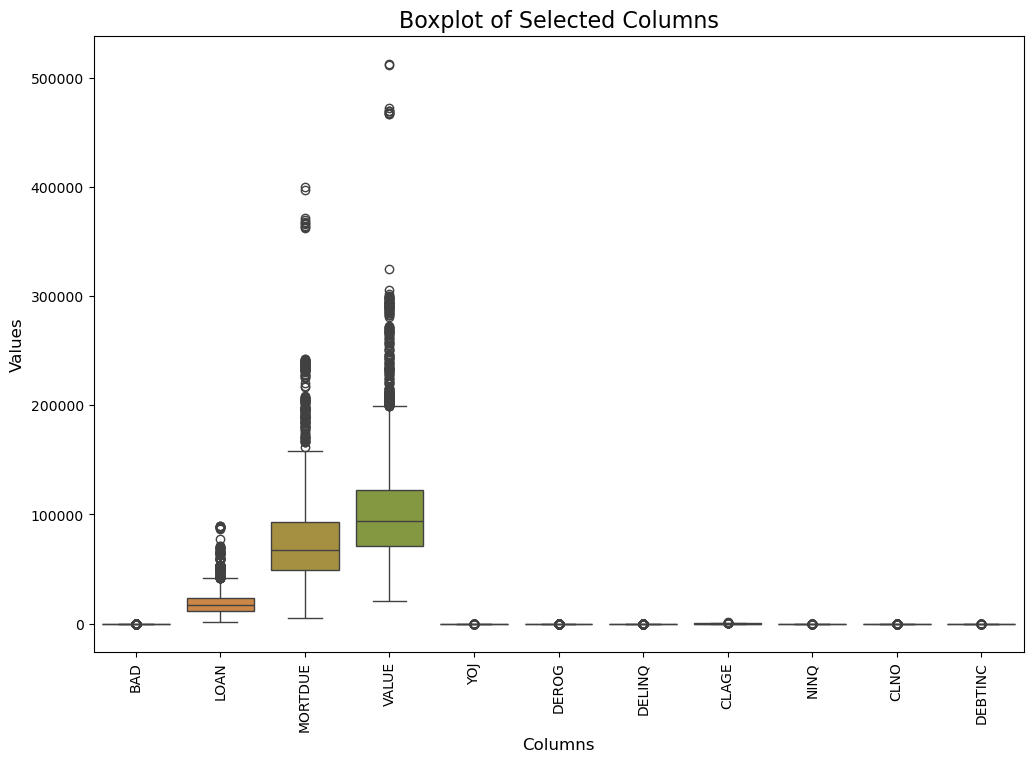

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# 분석할 컬럼 선택
columns_to_plot = ['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 
                   'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

# 데이터에서 해당 컬럼 선택
df_subset = df1[columns_to_plot]

# 박스플롯 그리기
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_subset)

# 그래프 제목과 라벨 설정
plt.title('Boxplot of Selected Columns', fontsize=16)
plt.xticks(rotation=90)  # x축 레이블이 잘 보이도록 회전
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Values', fontsize=12)

# 그래프 표시
plt.show()

# boxplot으로 이상치 확인 후 도메인 지식을 통한 이상치 제거

In [48]:
df1[df1['CLAGE'] > 1000] # 1000월이상은 나올수없는값이라고 판단하여 제거

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
2247,1,19300,96454,157809.0,DebtCon,Other,3.0,0,0.0,1168.233561,0.0,0,40.206138


In [49]:
cond1 = df1['CLAGE'] < 1000
df2 = df1.loc[cond1]
df2

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,0,88900,57264,90185.0,DebtCon,Other,16.0,0,0.0,221.808718,0.0,16,36.112347
3744,0,89000,54576,92937.0,DebtCon,Other,16.0,0,0.0,208.692070,0.0,15,35.859971
3745,0,89200,54045,92924.0,DebtCon,Other,15.0,0,0.0,212.279697,0.0,15,35.556590
3746,0,89800,50370,91861.0,DebtCon,Other,14.0,0,0.0,213.892709,0.0,16,34.340882


# 대출 상환여부에 따른 영향인자 확인

In [54]:
from scipy import stats
BAD_L = df2[df2['BAD'] == 0]['LOAN']   # 상환  
good_L = df2[df2['BAD'] == 1]['LOAN']  # 미상환 

# 상환 여부에 따라서 대출액이 차이가 있는가
# 귀무가설 : 상환 여부에 따라서 대출액이 차이가 없다 -> 귀무가설 참 => 상환 여부에 따라서 대출액이 차이가 없다
# 대립가설 : 상환 여부에 따라서 대출액이 차이가 있다 

weight_result= stats.ttest_ind(BAD_L,good_L)
t,p = weight_result.statistic, weight_result.pvalue
print("대출액-sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

# 가설 검정
alpha = 0.05  # 유의수준 5%

if p < alpha:
    print(" 상환 여부에 따라 대출액에 차이가 있다.")
else:
    print("상환 여부에 따라 대출액에 차이가 없다.")

대출액-sample t-test
t:1.8140191514554709
p:0.06976390935409335
상환 여부에 따라 대출액에 차이가 없다.


In [57]:
from scipy import stats
BAD_L = df2[df2['BAD'] == 0]['MORTDUE']   # 상환  
good_L = df2[df2['BAD'] == 1]['MORTDUE']  # 미상환 

# 상환 여부에 따라서 대출액이 차이가 있는가
# 귀무가설 : 상환 여부에 따라서 대출액이 차이가 없다 -> 귀무가설 참 => 상환 여부에 따라서 대출액이 차이가 없다
# 대립가설 : 상환 여부에 따라서 대출액이 차이가 있다 

weight_result= stats.ttest_ind(BAD_L,good_L)
t,p = weight_result.statistic, weight_result.pvalue
print("대출액-sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

# 가설 검정
alpha = 0.05  # 유의수준 5%

if p < alpha:
    print("상환 여부에 따라 저당금액에 차이가 있다.")
else:
    print("상환 여부에 따라 저당금액에 차이가 없다.")

대출액-sample t-test
t:0.9859685569597442
p:0.32421951401705373
상환 여부에 따라 대출액에 차이가 없다.


In [66]:
from scipy import stats
BAD_L = df2[df2['BAD'] == 0]['VALUE']   # 상환  
good_L = df2[df2['BAD'] == 1]['VALUE']  # 미상환 

# 상환 여부에 따라서 대출액이 차이가 있는가
# 귀무가설 : 상환 여부에 따라서 대출액이 차이가 없다 -> 귀무가설 참 => 상환 여부에 따라서 대출액이 차이가 없다
# 대립가설 : 상환 여부에 따라서 대출액이 차이가 있다 

weight_result= stats.ttest_ind(BAD_L,good_L)
t,p = weight_result.statistic, weight_result.pvalue
print("대출액-sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

# 가설 검정
alpha = 0.05  # 유의수준 5%

if p < alpha:
    print("상환 여부에 따라 재산액에 차이가 있다.")
else:
    print("상환 여부에 따라 재산액에 차이가 없다.")

대출액-sample t-test
t:1.5736066525705128
p:0.11567253590276917
상환 여부에 따라 재산액에 차이가 없다.


In [60]:
from scipy import stats
BAD_L = df2[df2['BAD'] == 0]['YOJ']   # 상환  
good_L = df2[df2['BAD'] == 1]['YOJ']  # 미상환 

# 상환 여부에 따라서 대출액이 차이가 있는가
# 귀무가설 : 상환 여부에 따라서 대출액이 차이가 없다 -> 귀무가설 참 => 상환 여부에 따라서 대출액이 차이가 없다
# 대립가설 : 상환 여부에 따라서 대출액이 차이가 있다 

weight_result= stats.ttest_ind(BAD_L,good_L)
t,p = weight_result.statistic, weight_result.pvalue
print("대출액-sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

# 가설 검정
alpha = 0.05  # 유의수준 5%

if p < alpha:
    print("상환 여부에 따라 근무년수에 차이가 있다.")
else:
    print("상환 여부에 따라 근무년수에 차이가 없다.")

대출액-sample t-test
t:3.6956429898394143
p:0.0002228281927921398
상환 여부에 따라 근무년수에 차이가 있다.


In [ ]:
df2['DEROG_flag'] = np.where(df2['DEROG'] == 0, 0, np.where(df2['DEROG'] == 1, 1, 2))  # 불량건수를 0개, 1개 ,2개이상으로 나눈 파생변수 생성
df2['DEROG_flag'].value_counts()

In [74]:
contingency_table_der = pd.crosstab(df2['BAD'], df2['DEROG_flag'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table_der)
print('test statistic : {}, p-value : {}'.format(chi2, p))
# 가설 검정
alpha = 0.05  # 유의수준 5%

if p < alpha:
    print("상환 여부에 따라 불량건수에 차이가 있다.")
else:
    print("상환 여부에 따라 불량건수에 차이가 없다.")

test statistic : 165.88506614283497, p-value : 9.517339727484051e-37
상환 여부에 따라 불량건수에 차이가 있다.


In [76]:
df2['DELINQ_flag'] = np.where(df2['DELINQ'] == 0, 0, np.where(df2['DELINQ'] == 1, 1, 2)) # 미상환횟수를 0건 , 1건 ,2건이상으로 파생변수 생성
df2['DELINQ_flag'].value_counts()

C:\Users\dn011\AppData\Local\Temp\ipykernel_13640\85377728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['DELINQ_flag'] = np.where(df2['DELINQ'] == 0, 0, np.where(df2['DELINQ'] == 1, 1, 2))


DELINQ_flag
0    2823
1     324
2     216
Name: count, dtype: int64

In [78]:
contingency_table_del = pd.crosstab(df2['BAD'], df2['DELINQ_flag'])  
chi2, p, dof, expected = stats.chi2_contingency(contingency_table_del)
print('test statistic : {}, p-value : {}'.format(chi2, p))
alpha = 0.05  # 유의수준 5%

if p < alpha:
    print("상환 여부에 따라 불량건수에 차이가 있다.")
else:
    print("상환 여부에 따라 불량건수에 차이가 없다.")

test statistic : 165.70080480056967, p-value : 1.0435840050953625e-36
상환 여부에 따라 불량건수에 차이가 있다.


In [63]:
from scipy import stats
BAD_L = df2[df2['BAD'] == 0]['CLAGE']   # 상환  
good_L = df2[df2['BAD'] == 1]['CLAGE']  # 미상환 

weight_result= stats.ttest_ind(BAD_L,good_L)
t,p = weight_result.statistic, weight_result.pvalue
print("대출액-sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

# 가설 검정
alpha = 0.05  # 유의수준 5%

if p < alpha:
    print("상환 여부에 따라 최장 대출기간에 차이가 있다.")
else:
    print("상환 여부에 따라 최장 대출기간에 차이가 없다.")

대출액-sample t-test
t:7.492577535599249
p:8.58577307365949e-14
상환 여부에 따라 최장 대출기간에 차이가 있다.


In [79]:
df2['NINQ_flag'] = np.where(df2['NINQ'] == 0, 0, np.where(df2['NINQ'] == 1, 1, 2))  ##신용거래 요청  0건 ,1건 ,2건이상
df2['NINQ_flag'].value_counts()

C:\Users\dn011\AppData\Local\Temp\ipykernel_13640\1066081133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['NINQ_flag'] = np.where(df2['NINQ'] == 0, 0, np.where(df2['NINQ'] == 1, 1, 2))


NINQ_flag
0    1671
2     872
1     820
Name: count, dtype: int64

In [81]:
contingency_table_der = pd.crosstab(df2['BAD'], df2['NINQ_flag'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table_der)
print('test statistic : {}, p-value : {}'.format(chi2, p))
# 가설 검정
alpha = 0.05  # 유의수준 5%

if p < alpha:
    print("상환 여부에 따라 신용 거래 요청에 차이가 있다.")
else:
    print("상환 여부에 따라 신용 거래 요청에 차이가 없다.")

test statistic : 24.449992877028052, p-value : 4.906270689217428e-06
상환 여부에 따라 최장 대출기간에 차이가 있다.


In [83]:
BAD_b = df2[df2['BAD'] == 0]['CLNO']   # 금융거래수  
good_b = df2[df2['BAD'] == 1]['CLNO']  

# 상환 여부에 따라서 금융거래수에 차이가 있는가
# 귀무가설 : 상환 여부에 따라서 금융거래수에 차이가 없다 -> o
# 대립가설 : 상환 여부에 따라서 금융거래수에 차이가 있다 -> 

weight_result= stats.ttest_ind(BAD_b,good_b)
t,p = weight_result.statistic, weight_result.pvalue
print("금융거래수 -sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

# 가설 검정
alpha = 0.05  # 유의수준 5%

if p < alpha:
    print("상환 여부에 따라 금융거래수에 차이가 있다.")
else:
    print("상환 여부에 따라 금융거래수에 차이가 없다.")

금융거래수 -sample t-test
t:-0.5676697546861259
p:0.5702971485482056
상환 여부에 따라 금융거래수에 차이가 없다.


In [84]:
BAD_b = df2[df2['BAD'] == 0]['DEBTINC']   # 대출금 대 수입 비율  
good_b = df2[df2['BAD'] == 1]['DEBTINC']  

# 상환 여부에 따라서 금융거래수에 차이가 있는가
# 귀무가설 : 상환 여부에 따라서 대출금 대 수입 비율  차이가 없다 -> 
# 대립가설 : 상환 여부에 따라서 대출금 대 수입 비율 차이가 있다 -> o 

weight_result= stats.ttest_ind(BAD_b,good_b)
t,p = weight_result.statistic, weight_result.pvalue
print("DEBTINC -sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

# 가설 검정
alpha = 0.05  # 유의수준 5%

if p < alpha:
    print("상환 여부에 따라 대출금 수입 비율 차이가 있다.")
else:
    print("상환 여부에 따라 대출금 수입 비율 차이가 없다.")

DEBTINC -sample t-test
t:-12.861367165100642
p:5.458066175349914e-37
상환 여부에 따라 대출금 수입 비율 차이가 있다.


In [85]:
# 차이가 있는것 => # 근무년수 /불량건수 / 채납횟수  / 상환여부 / 최장대출기간  / 대출금 대 수입 비율

In [93]:
df1['JOB'].value_counts()

JOB
Other      1286
ProfExe     899
Office      577
Mgr         450
Self         99
Sales        53
Name: count, dtype: int64

In [105]:
# 직업을 3등급으로 분류 
def map_job_to_grade(job):
    if job in ['ProfExe', 'Mgr', 'Office']:
        return '사무직'
    elif job in ['Self', 'Sales']:
        return '판매업' if job == 'Self' else '자영업'
    else:
        return None  # 'other'는 None으로 처리

# 'JOB' 열을 등급으로 변환
df2['JOB_Grade'] = df2['JOB'].apply(map_job_to_grade)

# 결과 확인
df2['JOB_Grade'].value_counts()

C:\Users\dn011\AppData\Local\Temp\ipykernel_13640\3118603586.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['JOB_Grade'] = df2['JOB'].apply(map_job_to_grade)


JOB_Grade
사무직    1926
판매업      99
자영업      53
Name: count, dtype: int64

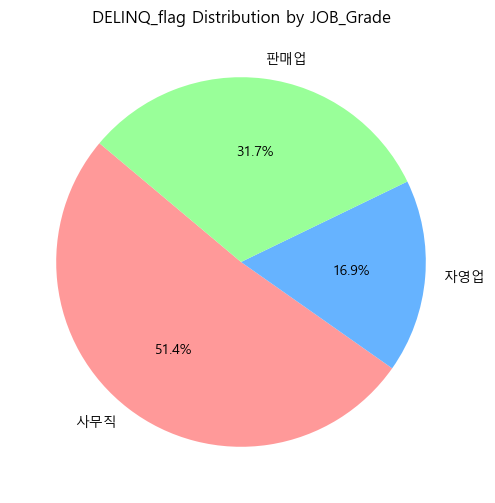

In [116]:
import matplotlib.pyplot as plt

# JOB_Grade별 NINQ_flag 비율 계산
ninq_flag_distribution = df2.groupby('JOB_Grade')['DELINQ_flag'].mean()  #불량건수

# 파이 차트 그리기
plt.figure(figsize=(8, 6))
ninq_flag_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('DELINQ_flag Distribution by JOB_Grade')
plt.ylabel('')  # y축 레이블 제거
plt.show()

# 불량거래수가 사무직에 많이 분포되어있으므로 사무직에 근무하는 사람에 대한 신용관리 정보 시스템을 제공한다

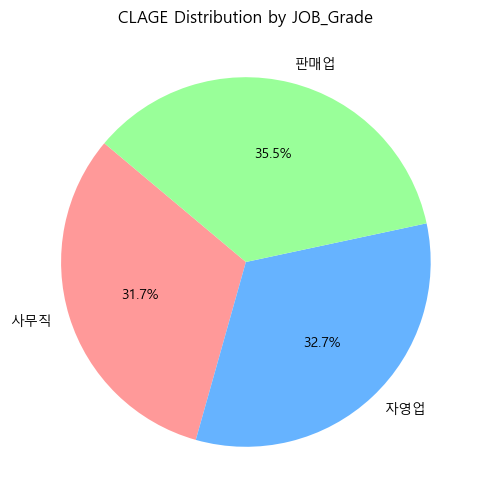

In [117]:
import matplotlib.pyplot as plt

# JOB_Grade별 NINQ_flag 비율 계산
ninq_flag_distribution = df2.groupby('JOB_Grade')['CLAGE'].mean()  #체납횟수

# 파이 차트 그리기
plt.figure(figsize=(8, 6))
ninq_flag_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('CLAGE Distribution by JOB_Grade')
plt.ylabel('')  # y축 레이블 제거
plt.show()

# 각 직업들에 대한 체납횟수 관리가 필요하다 

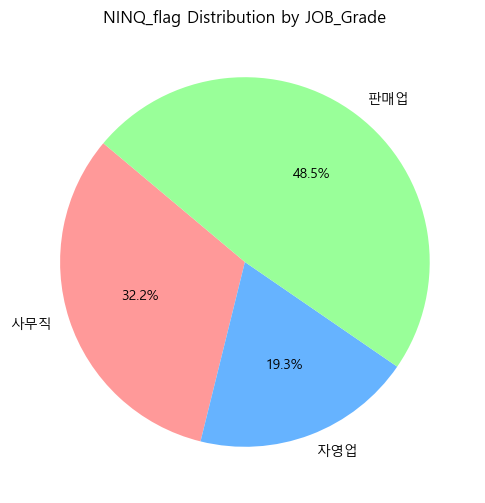

In [118]:
import matplotlib.pyplot as plt

# JOB_Grade별 NINQ_flag 비율 계산
ninq_flag_distribution = df2.groupby('JOB_Grade')['NINQ_flag'].mean()  #최장 대출 기간

# 파이 차트 그리기
plt.figure(figsize=(8, 6))
ninq_flag_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('NINQ_flag Distribution by JOB_Grade')
plt.ylabel('')  # y축 레이블 제거
plt.show()

## 최장 대출 기간이 판매업이 많이 분포되어 있으므로 판매업에 대한 대출서비스에 대한 강화를 통해서 연쳬기간을 낮추는 방안을 고려해야한다